In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)


from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings

warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# Code starts here
train_data= pd.read_csv(r"C:\Users\vaibh\Desktop\Python DS\Sprint 7_Logistic Regression\Sprint 7_Forest Cover Type Prediction\file (1)\train.csv")
train_data

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2524,2744,96,17,30,-7,458,245,214,92,351,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
1,13295,2504,103,8,30,6,404,234,230,127,1510,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
2,4312,2311,30,7,0,0,1230,218,226,143,150,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,10656,2710,191,26,443,-45,1209,210,249,158,939,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,868,2802,91,11,540,18,1699,237,223,115,1084,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,1955,2847,291,36,743,354,934,101,209,236,1879,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2
9068,10882,2590,93,24,85,-3,2190,249,194,59,636,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
9069,7993,3350,214,10,85,0,2623,211,250,174,691,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
9070,3436,2110,113,30,60,32,750,254,194,44,90,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [3]:
train_data.nunique()

Id                                    9072
Elevation                             1599
Aspect                                 361
Slope                                   51
Horizontal_Distance_To_Hydrology       345
Vertical_Distance_To_Hydrology         386
Horizontal_Distance_To_Roadways       2665
Hillshade_9am                          172
Hillshade_Noon                         135
Hillshade_3pm                          247
Horizontal_Distance_To_Fire_Points    2271
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               1
Soil_Type8                               2
Soil_Type9 

### 1. Drop Columns- ID(Because all are unique values), Soil_Type7 & Soil_Type15(Because only 1 value)

In [4]:
train_data.drop(['Id','Soil_Type7','Soil_Type15'],axis=1, inplace=True)
train_data.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type'],
      dtype

In [5]:
train_data.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,-0.002747,-0.308519,0.404080,0.122408,0.578398,0.095177,0.219430,0.092541,0.432142,0.333439,0.264110,0.348913,-0.783816,-0.225864,-0.148007,-0.300409,-0.122635,-0.144282,-0.196094,0.003787,-0.010893,-0.355532,-0.033768,0.016819,0.039448,-0.140252,-0.064260,-0.200622,-0.038520,0.031260,0.008185,0.033168,0.149263,0.162902,0.087743,0.013677,0.021470,0.040684,0.002086,0.166199,0.047918,0.092400,0.167298,0.119936,0.020491,0.121868,0.038559,0.076537,0.323614,0.300570,0.305479,0.016639
Aspect,-0.002747,1.000000,0.024327,0.038210,0.040190,0.072182,-0.593524,0.335673,0.638884,-0.052493,-0.118342,0.033637,0.030579,0.063736,-0.034383,-0.018191,-0.067722,0.018022,0.000925,-0.013335,0.002257,-0.012424,0.099989,-0.031792,-0.044010,0.027855,0.012594,0.038382,0.021890,-0.048155,0.009128,-0.019843,0.031037,0.025315,0.055700,0.012830,-0.003021,-0.011015,0.023528,0.026083,-0.057058,-0.086162,0.000764,-0.005688,0.022254,0.010137,-0.007861,0.003632,-0.047946,0.045510,-0.027938,0.008480,0.001174
Slope,-0.308519,0.024327,1.000000,-0.048597,0.265739,-0.278127,-0.204889,-0.610468,-0.320700,-0.246151,-0.159047,-0.064572,-0.101853,0.281041,0.105315,-0.073210,0.254607,0.087737,0.074755,-0.043235,-0.016722,-0.029108,0.258105,-0.109696,-0.113015,0.122345,-0.050955,-0.055029,-0.133797,-0.076471,-0.050021,-0.073295,-0.038047,-0.078667,-0.182754,0.018312,0.014177,-0.028910,0.009950,0.042211,-0.085242,0.109019,-0.084061,-0.140229,0.078578,-0.034475,-0.053683,-0.006993,-0.000437,-0.153320,0.061161,-0.033776,0.084516
Horizontal_Distance_To_Hydrology,0.404080,0.038210,-0.048597,1.000000,0.648312,0.184785,-0.029210,0.086149,0.078717,0.145716,-0.010626,0.102881,0.190648,-0.233905,-0.088127,0.030542,-0.087132,-0.059832,-0.026763,0.023851,0.003681,-0.001235,-0.113408,0.034000,0.034020,0.033007,-0.112451,-0.084318,-0.163772,-0.017271,-0.033347,-0.073398,-0.025572,-0.003975,-0.088357,0.037116,-0.005971,0.029606,0.083028,0.035486,0.030373,-0.030152,0.056782,0.138262,0.066646,0.079410,-0.002354,0.081605,-0.006955,0.122668,0.068009,0.231896,-0.024254
Vertical_Distance_To_Hydrology,0.122408,0.040190,0.265739,0.648312,1.000000,-0.000252,-0.084879,-0.130356,-0.042497,-0.028115,-0.115921,0.031124,0.059745,0.031272,-0.035064,0.008849,0.067096,-0.014670,0.013996,0.106247,-0.009068,-0.017079,0.015168,-0.028773,-0.032078,0.085955,-0.086917,-0.070246,-0.156178,-0.043345,-0.040699,-0.071947,-0.022704,-0.060608,-0.146296,0.018516,-0.015031,-0.014873,0.064504,0.075073,-0.056406,-0.002837,-0.000107,0.019000,0.065796,0.028567,-0.010710,0.013105,-0.020721,-0.009168,0.072188,0.222660,0.074388
Horizontal_Distance_To_Roadways,0.578398,0.072182,-0.278127,0.184785,-0.000252,1.000000,-0.006574,0.247233,0.179244,0.481187,0.376711,-0.077423,0.116579,-0.443181,-0.131791,-0.088013,-0.158127,-0.096880,-0.092067,-0.140903,0.023869,-0.019911,-0.208880,-0.077798,0.073898,0.005129,-0.074406,-0.007864,-0.078569,-0.046995,0.054986,0.038598,-0.004567,0.116891,0.131380,0.032634,-0.008612,0.024732,0.031771,-0.012664,0.279803,-0.065777,0.023641,0.021908,0.036907,0.018824,0.058374,0.029567,0.065783,0.200063,0.122380,0.136539,-0.107464
Hillshade_9am,0.095177,-0.593524,-0.204889,-0.029210,-0.084879,-0.006574,1.000000,-0.024346,-0.781940,0.075327,0.170318,-0.017660,-0.019735,-0.129

In [6]:
corr_matrix= train_data.corr()
for column in corr_matrix.columns.tolist():
    for row in corr_matrix.index.tolist():
        if (abs(corr_matrix.loc[row,column])>0.6) & (abs(corr_matrix.loc[row,column])<1):
            print("{} and {}:{}".format(row,column,corr_matrix.loc[row,column]))

Wilderness_Area4 and Elevation:-0.7838164263939736
Hillshade_3pm and Aspect:0.6388835150081469
Hillshade_Noon and Slope:-0.6104681633668962
Vertical_Distance_To_Hydrology and Horizontal_Distance_To_Hydrology:0.6483122317875543
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology:0.6483122317875543
Hillshade_3pm and Hillshade_9am:-0.7819401155932078
Slope and Hillshade_Noon:-0.6104681633668962
Hillshade_3pm and Hillshade_Noon:0.6196716447675731
Aspect and Hillshade_3pm:0.6388835150081469
Hillshade_9am and Hillshade_3pm:-0.7819401155932078
Hillshade_Noon and Hillshade_3pm:0.6196716447675731
Elevation and Wilderness_Area4:-0.7838164263939736


In [7]:
train_data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.00000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.00000
mean,2749.531415,156.480930,16.529872,226.781966,51.213624,1717.954806,212.691027,219.030423,135.119378,1520.420525,0.239528,0.032959,0.420084,0.307429,0.025022,0.040675,0.061728,0.055004,0.010913,0.045635,0.000110,0.000551,0.138117,0.026675,0.01455,0.033069,0.011243,0.007716,0.040344,0.004740,0.003086,0.009700,0.001102,0.022707,0.049824,0.015322,0.000110,0.003968,0.000882,0.000551,0.086530,0.048721,0.020944,0.045635,0.041005,0.001653,0.006834,0.000551,0.002425,0.048391,0.044312,0.029652,4.00000
std,417.236330,109.411024,8.495603,208.875071,61.621329,1322.812625,30.720175,22.885044,46.225735,1121.444963,0.426819,0.178538,0.493599,0.461454,0.156201,0.197546,0.240675,0.228001,0.103898,0.208704,0.010499,0.023471,0.345042,0.161142,0.11975,0.178826,0.105443,0.087506,0.196775,0.068687,0.055473,0.098016,0.033184,0.148977,0.217592,0.122836,0.010499,0.062872,0.029684,0.023471,0.281161,0.215297,0.143203,0.208704,0.198313,0.040631,0.082391,0.023471,0.049188,0.214602,0.205799,0.169634,2.00011
min,1863.000000,0.000000,0.000000,0.000000,-123.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,2375.750000,65.000000,10.000000,67.000000,5.000000,765.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
50%,2755.000000,125.000000,15.000000,180.000000,32.000000,1321.000000,220.000000,223.000000,138.000000,1252.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000
75%,3099.000000,258.250000,22.000000,324.000000,80.000000,2263.000000,235.000000,235.000000,168.000000,1987.000000,0.000000,0.000000,1.000000,1.000000,0.00000

In [8]:
train_subset = train_data[['Horizontal_Distance_To_Roadways','Elevation','Horizontal_Distance_To_Fire_Points','Hillshade_3pm',
       'Aspect','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Hydrology','Hillshade_Noon',
       'Wilderness_Area1','Soil_Type29','Soil_Type30']].copy()

### Feature Engineering

In [9]:
def power_trans(df,col,power):
    lst=[]
    for i in df[col]:
        if i<0:
            lst.append(-np.power(abs(i),power))
        else:
            lst.append(np.power(i,power))
    return pd.DataFrame(lst)
def log_trans(df,col,power):
    lst=[]
    for i in df[col]:
        if i<0:
            lst.append(-np.log(abs(i)))
        elif i==0:
            lst.append(np.log(1))
        else:
            lst.append(np.log(i))
    return pd.DataFrame(lst)

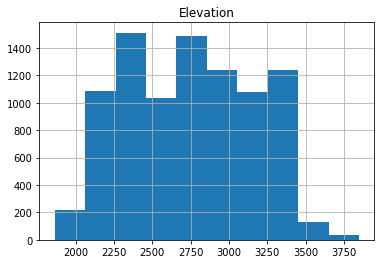

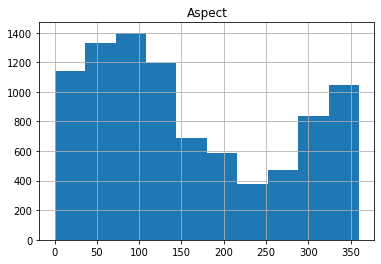

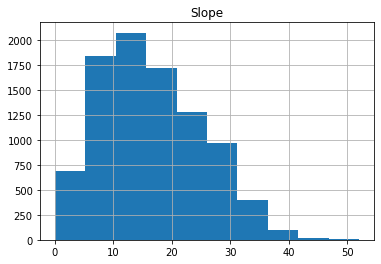

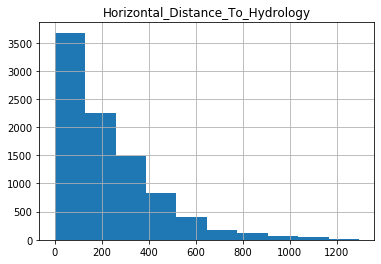

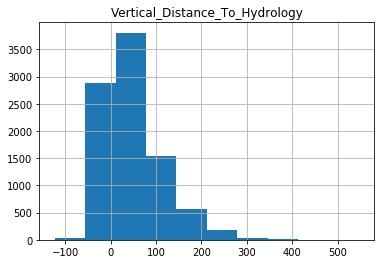

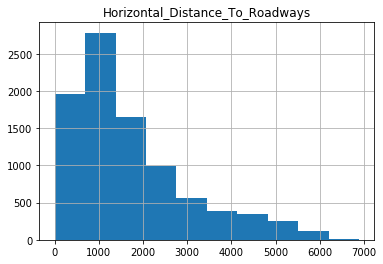

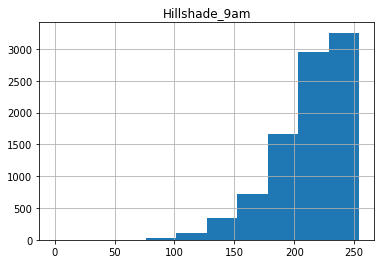

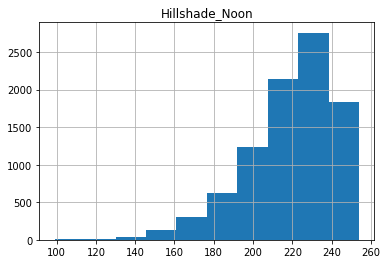

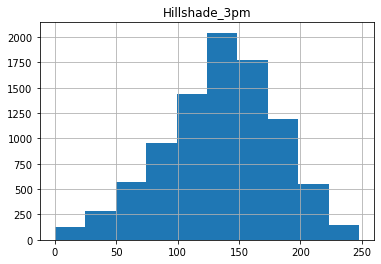

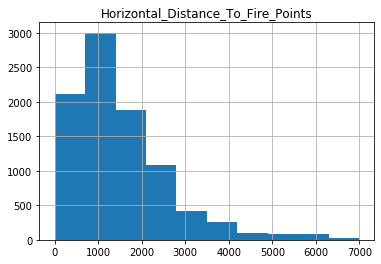

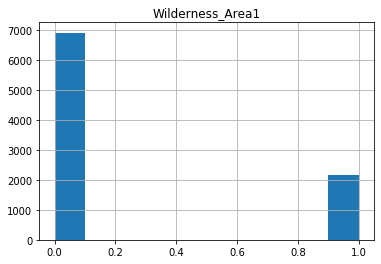

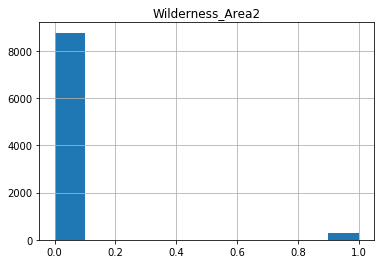

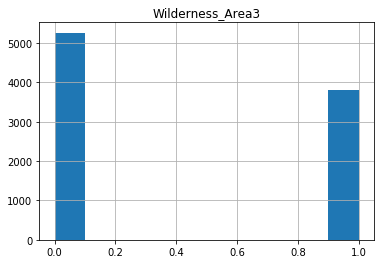

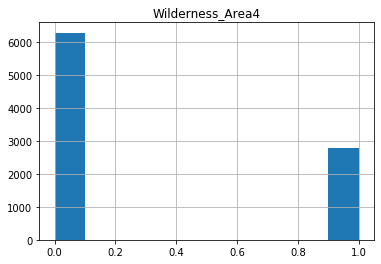

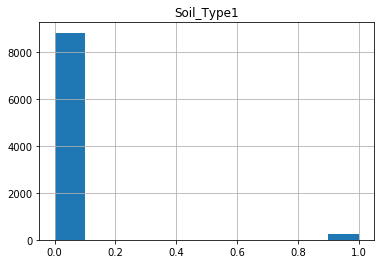

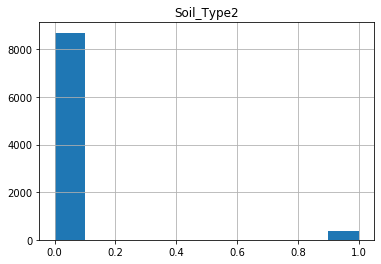

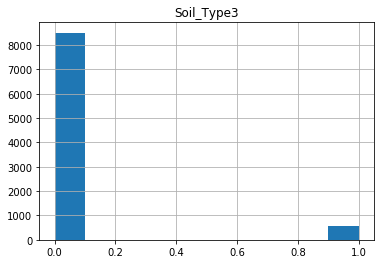

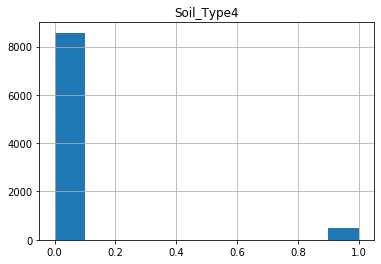

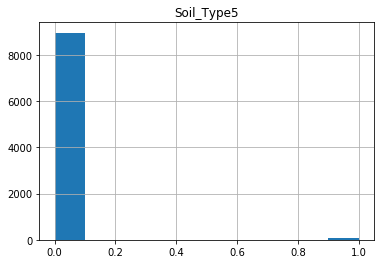

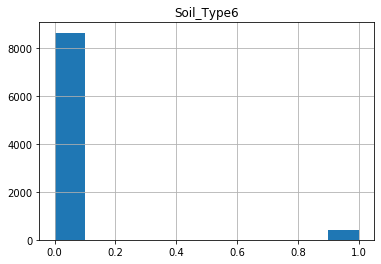

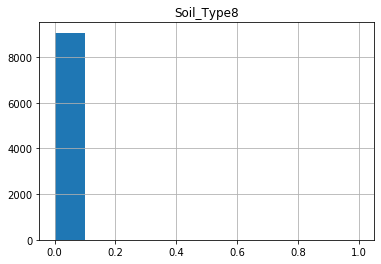

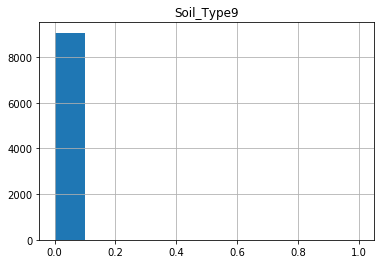

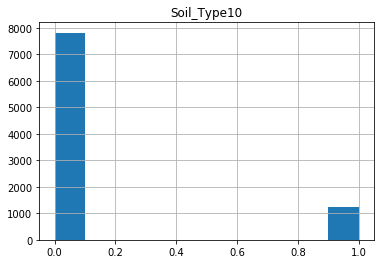

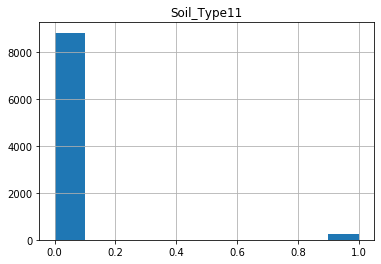

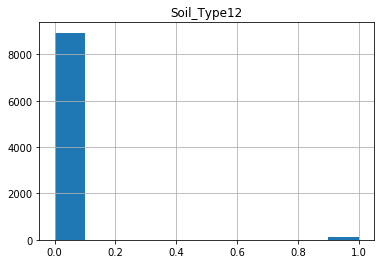

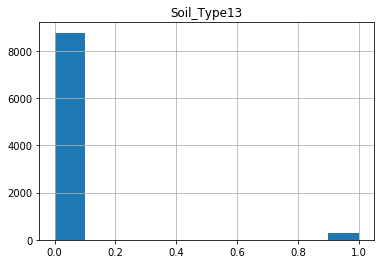

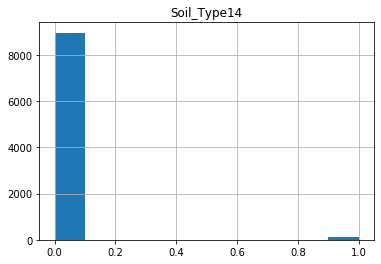

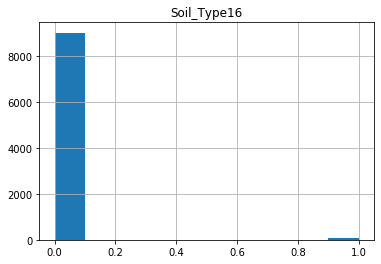

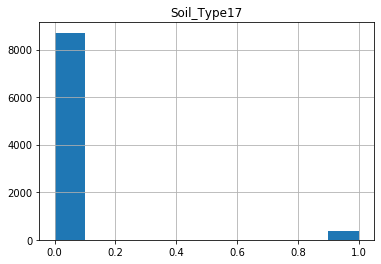

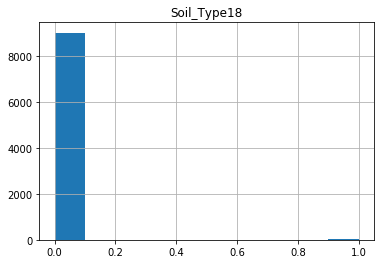

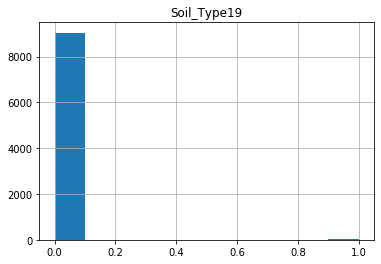

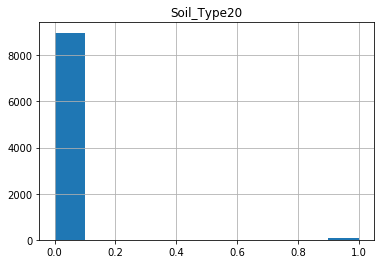

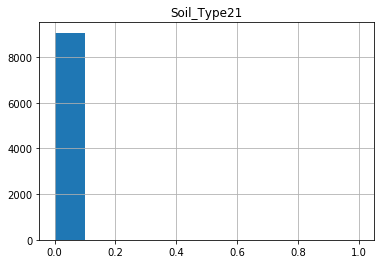

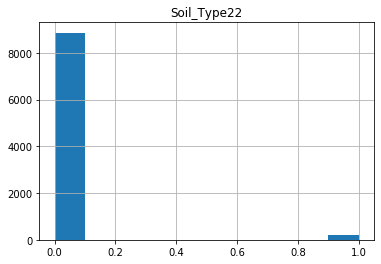

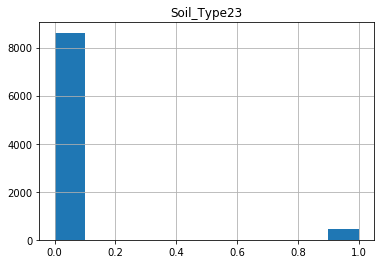

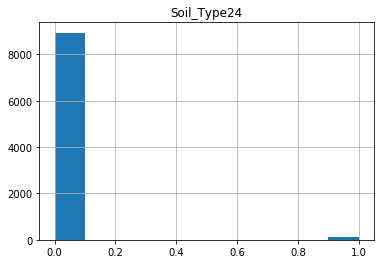

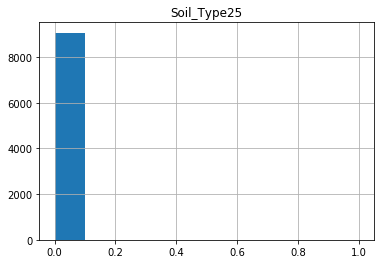

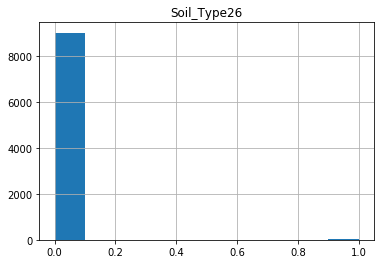

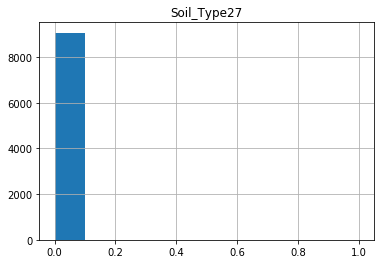

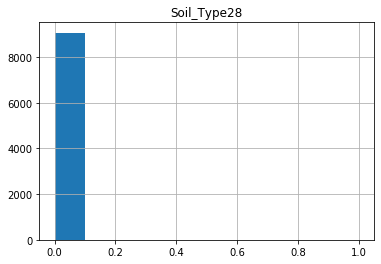

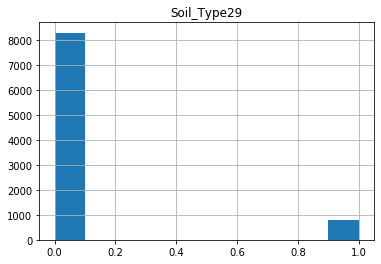

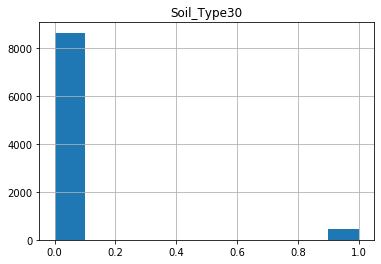

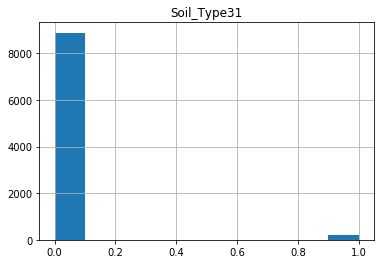

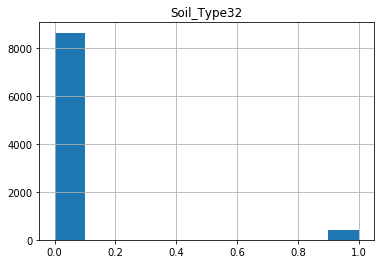

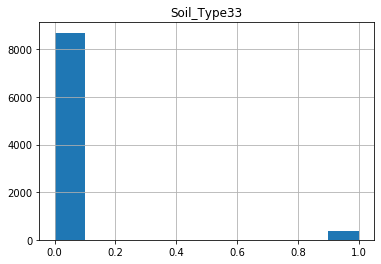

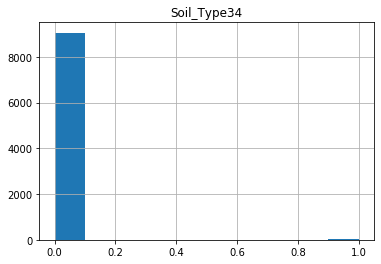

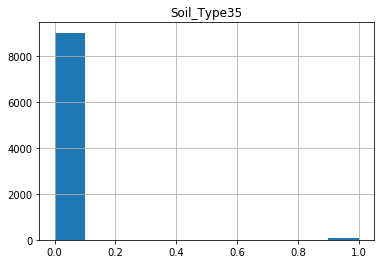

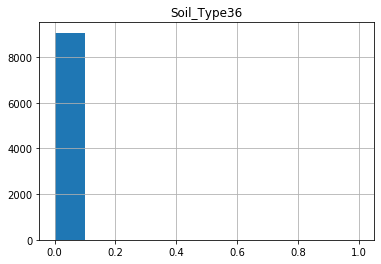

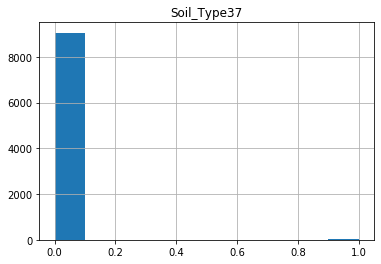

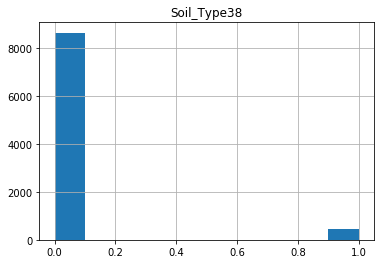

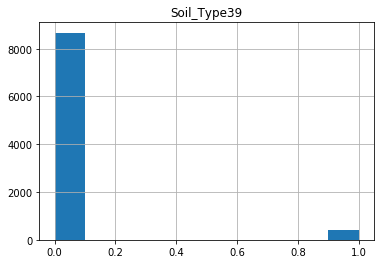

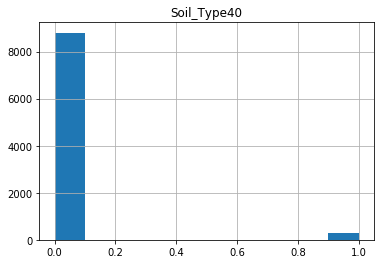

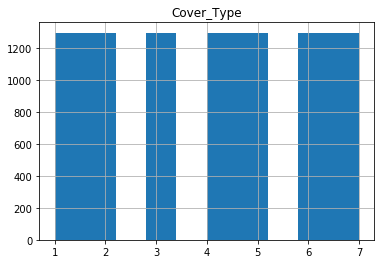

In [10]:
for col in train_data.columns.tolist():
    train_data[col].hist()
    plt.title(col)
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211C3B29F08>]],
      dtype=object)

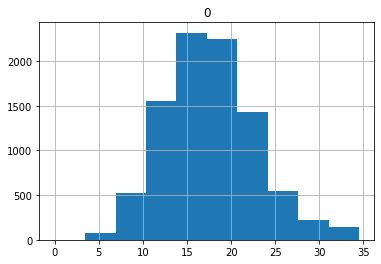

In [11]:
power_trans(train_data,'Horizontal_Distance_To_Fire_Points',0.4).hist()

In [12]:
train_data['Aspect'] = power_trans(train_data,'Aspect',0.6)
train_data['Slope']= power_trans(train_data,'Slope',0.6)
train_data['Horizontal_Distance_To_Hydrology']= power_trans(train_data,'Horizontal_Distance_To_Hydrology',0.4)
train_data['Vertical_Distance_To_Hydrology'] = power_trans(train_data,'Vertical_Distance_To_Hydrology',0.47)
train_data['Horizontal_Distance_To_Roadways'] = power_trans(train_data,'Horizontal_Distance_To_Roadways',0.4)

train_data['Hillshade_9am'] = power_trans(train_data,'Hillshade_9am',4.3)
train_data['Hillshade_Noon'] = power_trans(train_data,'Hillshade_Noon',4.7)

train_data['Horizontal_Distance_To_Fire_Points'] = power_trans(train_data,'Horizontal_Distance_To_Fire_Points',0.4)

In [13]:
# Train_subset Feature Engineering

train_subset['Aspect'] = power_trans(train_subset,'Aspect',0.6)

train_subset['Horizontal_Distance_To_Hydrology'] = power_trans(train_subset,'Horizontal_Distance_To_Hydrology',0.4)
train_subset['Vertical_Distance_To_Hydrology'] = power_trans(train_subset,'Vertical_Distance_To_Hydrology',0.47)
train_subset['Horizontal_Distance_To_Roadways'] = power_trans(train_subset,'Horizontal_Distance_To_Roadways',0.4)


train_subset['Hillshade_Noon'] = power_trans(train_subset,'Hillshade_Noon',4.7)

train_subset['Horizontal_Distance_To_Fire_Points'] = power_trans(train_subset,'Horizontal_Distance_To_Fire_Points',0.4)

### EDA & Data Preprocessing

- The target is the only categorical feature consisting of 7 classes and all the other features are continuous. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots. 

### Feature Selection and Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different feature selection techniques like wrapper methods, PCA and try using hyperparameter tuning to find the parameters that give the best accuracy.

### Model Run on Self made Subset of Train Data

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
# Split the train data into train and validation set
X= train_subset
y= train_data['Cover_Type']
for n in [5,7,9,11,13,15]:
    random_state=0
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=random_state,test_size=0.3)
    
    # Standardize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Initialize the Logistic Regression Model 
    model= LogisticRegression() 
    
    #ANNOVA 
    #anova = SelectKBest(score_func = f_regression,  k = n)
    #X_train = anova.fit_transform(X_train,y_train)
    #X_test = anova.transform(X_test)
    
    #RFE
    #rfe = RFE(model,n)
    #X_train = rfe.fit_transform(X_train,y_train)
    #X_test = rfe.transform(X_test)
    
    #PCA
    #pca= PCA(n_components=11,random_state=0)
    #X_train= pca.fit_transform(X_train)
    #X_test= pca.transform(X_test)
    
    #Polynomial Features
    poly = PolynomialFeatures(3)
    X_train = poly.fit_transform(X_train)
    X_test = poly.transform(X_test)
    
    #Predict the accuracy score
    model.fit(X_train,y_train)
    pred= model.predict(X_test)
    acc_score= accuracy_score(y_test, pred)
    print(acc_score)

0.7567964731814842
0.7567964731814842
0.7567964731814842
0.7567964731814842
0.7567964731814842
0.7567964731814842


### Model Run on Entire Dataset

In [16]:
# Split the train data into train and validation set
X= train_data.drop('Cover_Type',axis=1)
y= train_data['Cover_Type']
for n in [5,7,9,11,13,15]:
    random_state=0
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=random_state,test_size=0.3)
    
    # Standardize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Initialize the Logistic Regression Model 
    clf= RandomForestClassifier(max_depth=15, random_state=0,criterion='entropy' ) 
    
    #ANNOVA 
    #anova = SelectKBest(score_func = f_regression,  k = n)
    #X_train = anova.fit_transform(X_train,y_train)
    #X_test = anova.transform(X_test)
    
    #RFE
    #rfe = RFE(model,n)
    #X_train = rfe.fit_transform(X_train,y_train)
    #X_test = rfe.transform(X_test)
    
    #PCA
    #pca= PCA(n_components=11,random_state=0)
    #X_train= pca.fit_transform(X_train)
    #X_test= pca.transform(X_test)
    
    #Polynomial Features
    poly = PolynomialFeatures(3)
    X_train = poly.fit_transform(X_train)
    X_test = poly.transform(X_test)
    
    #Predict the accuracy score
    clf.fit(X_train,y_train)
    pred= clf.predict(X_test)
    acc_score= accuracy_score(y_test, pred)
    print(acc_score)

0.8519470977222631
0.8519470977222631
0.8519470977222631
0.8519470977222631
0.8519470977222631
0.8519470977222631


In [17]:
for n in range(10):
    X = train_data.drop('Cover_Type',1)
    y = train_data['Cover_Type']

    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=n,test_size=0.3)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    clf = RandomForestClassifier()
    
    #rfe = RFE(clf,35)

    #X_train = rfe.fit_transform(X_train,y_train)
    #X_test = rfe.transform(X_test)
    
    poly = PolynomialFeatures(2)
    X_train = poly.fit_transform(X_train)
    X_test = poly.transform(X_test)

    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    print(accuracy_score(y_test,pred))

0.8545187362233652
0.8376193975018369
0.8423952975753123
0.84313005143277
0.8387215282880235
0.84313005143277
0.8365172667156503
0.8335782512858193
0.8387215282880235
0.8302718589272594


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [31]:
test= pd.read_csv(r"C:\Users\vaibh\Desktop\Python DS\Sprint 7_Logistic Regression\Sprint 7_Forest Cover Type Prediction\file (1)\test.csv")
test

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,6376,2707,28,5,240,8,30,218,230,148,708,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8962,3401,161,15,361,45,2881,234,242,135,1801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,7122,2789,336,20,256,67,1731,172,209,174,1091,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,931,2942,350,9,242,33,5032,203,224,160,1838,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3678,2311,22,23,127,48,1149,199,184,113,819,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,3982,2199,188,24,0,0,932,215,249,155,408,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6044,8524,2584,345,11,30,4,1667,199,223,163,2892,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6045,4332,2241,162,5,0,0,638,224,241,151,569,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6046,4935,2283,101,31,210,86,680,253,182,32,1614,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
Id = test['Id'].copy()
test.drop(['Id','Soil_Type7','Soil_Type15'],axis=1,inplace=True)
test.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
      dtype='object')

In [33]:
test['Aspect'] = power_trans(test,'Aspect',0.6)
test['Slope'] = power_trans(test,'Slope',0.4)
test['Horizontal_Distance_To_Hydrology'] = power_trans(test,'Horizontal_Distance_To_Hydrology',0.4)
test['Vertical_Distance_To_Hydrology'] = power_trans(test,'Vertical_Distance_To_Hydrology',0.47)
test['Horizontal_Distance_To_Roadways'] = power_trans(test,'Horizontal_Distance_To_Roadways',0.4)

test['Hillshade_9am'] = power_trans(test,'Hillshade_9am',4.3)
test['Hillshade_Noon'] = power_trans(test,'Hillshade_Noon',4.7)

test['Horizontal_Distance_To_Fire_Points'] = power_trans(test,'Horizontal_Distance_To_Fire_Points',0.4)

In [34]:
random_state = 0

test = scaler.transform(test)

clf = RandomForestClassifier(min_samples_split = 6, random_state = random_state, criterion = 'entropy')
clf.fit(X_train,y_train)

#anova = SelectKBest(score_func = f_regression,  k = n)
#X_train = anova.fit_transform(X_train,y_train)
#X_test = anova.transform(X_test)
    
#pca = PCA(n_components=n,random_state=0)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
    
#rfe = RFE(clf,n)

#X_train = rfe.fit_transform(X_train,y_train)
#X_test = rfe.transform(X_test)

test = poly.transform(test)

pred = clf.predict(test)

In [35]:
submission= pd.DataFrame({'Id':Id,'Cover_Type':pred})
submission.to_csv("first Submission.csv",index=False)